In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import typing
import math
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def euler_recursion(derivative_lambda, step:float, target_x:float, input_point:float, points=None, mode=None, accuracy=3) -> float:
  x,y = input_point
  # samples datapoints for graphing
  samples_x = [f'slope at x={x}, x values']
  samples_y = [f'slope at x={x}, y estimates']
  for i in range(0,2):
    samples_x.append((round(step*i+x, accuracy)))
    samples_y.append(round(y+(derivative_lambda(x,y)*(step*i)), accuracy))
  points.append(samples_x)
  points.append(samples_y)
    
  #calculate next x and y
  y = round(y + derivative_lambda(x,y)*step, accuracy)
  x = round(x + step, accuracy)
  print('x=',x,' y=',y, ' slope=', derivative_lambda(x,y))

  #handle last iteration
  if step > 0:
    if x >= target_x:
      return x, y, points
  elif step <= 0:
    if x <= target_x:
      return x, y, points

  return euler_recursion(derivative_lambda, step, target_x, (x,y), points, accuracy = accuracy)

#define function f'(x)
dy_dx = lambda x,y: math.sin(x)

#values
accuracy = 5

step = .3
initial_x = -math.pi
initial_y = 0
target_x = math.pi

#estimate f(x) and collect all estimate lines -- activate function
x, result, data = euler_recursion(dy_dx, step, target_x, (initial_x, initial_y), points=[], accuracy=accuracy)
print(f'Estimate of y at x={x}: ', result)

x= -2.84159  y= -0.0  slope= -0.2955227417314557
x= -2.54159  y= -0.08866  slope= -0.5646446634952113
x= -2.24159  y= -0.25805  slope= -0.7833285591225927
x= -1.94159  y= -0.49305  slope= -0.9320400475127837
x= -1.64159  y= -0.77266  slope= -0.9974951743080588
x= -1.34159  y= -1.07191  slope= -0.973847027973607
x= -1.04159  y= -1.36406  slope= -0.8632080269913643
x= -0.74159  y= -1.62302  slope= -0.6754612238083356
x= -0.44159  y= -1.82566  slope= -0.42737748119571684
x= -0.14159  y= -1.95387  slope= -0.141117381025386
x= 0.15841  y= -1.99621  slope= 0.15774831450893145
x= 0.45841  y= -1.94889  slope= 0.44252282292227496
x= 0.75841  y= -1.81613  slope= 0.6877680855081054
x= 1.05841  y= -1.6098  slope= 0.871577073361631
x= 1.35841  y= -1.34833  slope= 0.9775306770272372
x= 1.65841  y= -1.05507  slope= 0.996164376645924
x= 1.95841  y= -0.75622  slope= 0.9258136793265926
x= 2.25841  y= -0.47848  slope= 0.7727628033387292
x= 2.55841  y= -0.24665  slope= 0.5506833276103729
x= 2.85841  y= -0

In [3]:
#plot data prep
df = pd.DataFrame(data, index = [i[0] for i in data])
df = df.drop(0, axis=1)
df = df.transpose()
df['x_final'] = x
df['y_final_estimate'] = result

#plot data for f'(x) prep
#linespace = np.linspace(initial_x, target_x)
xes = []
ys = []
factor = 10
#establish lower and upper bounds 
if step > 0:
    u_bound = target_x - initial_x
    d_bound = 0
elif step < 0:
    d_bound = target_x - initial_x
    u_bound = 0
elif step == 0:
    print('step == 0, ERROR')
if True:
    for i in range(int(d_bound*factor), int(u_bound*factor)+1):
        x = i/factor+initial_x
        xes.append(x)
        if len(ys) == 0:
            ys.append(dy_dx(x,initial_y)+initial_y)
        else:
            ys.append(dy_dx(x,ys[-1])+initial_y)
dy_dx_data = pd.DataFrame(ys, xes, columns=['y'])
dy_dx_data.reset_index(inplace=True)
dy_dx_data.columns.values[0] = 'x'

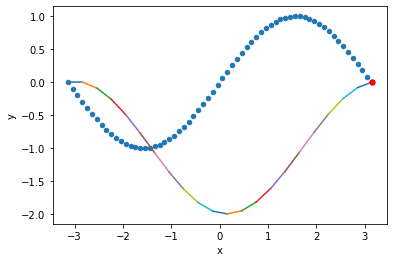

In [4]:
ax1 = plt.axes()
#plot euler approximation lines
for i in range((len(df.columns)-2)//2):
    x = round(initial_x+step*i, accuracy)
    #print(x)
    if i == 0:
        x = initial_x
        df.plot(x = f'slope at x={x}, x values', y = f'slope at x={x}, y estimates', ax = ax1, kind='line')
    else:
        df.plot(x = df.columns[i*2], y = df.columns[i*2+1], ax = ax1, kind='line')

#plot final estimate
plt.plot(df['x_final'], df['y_final_estimate'], marker="o", markersize=5, mfc = 'red', mec = 'red')
#plot f'(x)
dy_dx_data.plot(x='x', y='y', ax=ax1, kind='scatter')
ax1.get_legend().set_visible(False)

In [5]:
df

,"slope at x=-3.141592653589793, x values","slope at x=-3.141592653589793, y estimates","slope at x=-2.84159, x values","slope at x=-2.84159, y estimates","slope at x=-2.54159, x values","slope at x=-2.54159, y estimates","slope at x=-2.24159, x values","slope at x=-2.24159, y estimates","slope at x=-1.94159, x values","slope at x=-1.94159, y estimates",...,"slope at x=1.95841, x values","slope at x=1.95841, y estimates","slope at x=2.25841, x values","slope at x=2.25841, y estimates","slope at x=2.55841, x values","slope at x=2.55841, y estimates","slope at x=2.85841, x values","slope at x=2.85841, y estimates",x_final,y_final_estimate
1,-3.14159,0.0,-2.84159,-0.00000,-2.54159,-0.08866,-2.24159,-0.25805,-1.94159,-0.49305,...,1.95841,-0.75622,2.25841,-0.47848,2.55841,-0.24665,2.85841,-0.08145,3.15841,0.00237
2,-2.84159,-0.0,-2.54159,-0.08866,-2.24159,-0.25805,-1.94159,-0.49305,-1.64159,-0.77266,...,2.25841,-0.47848,2.55841,-0.24665,2.85841,-0.08145,3.15841,0.00237,3.15841,0.00237


In [6]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

tsf = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
#df.cumsum()
tsf

,A,B,C,D
2000-01-01,1.284317,-0.159738,2.086581,0.041240
2000-01-02,0.196472,-0.918043,1.950436,0.832012
2000-01-03,-0.260658,-0.734761,0.268615,-1.450777
2000-01-04,-0.006934,0.957143,-0.603651,-0.171747
2000-01-05,-0.158181,-0.138328,0.306422,-2.199847
...,...,...,...,...
2002-09-22,-0.724630,0.513055,0.371363,0.690072
2002-09-23,-0.048272,-0.783125,0.821927,-1.415494
2002-09-24,1.532417,-0.989586,0.581933,1.967107
2002-09-25,-1.141578,-0.485795,0.184345,-1.127578
